In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [2]:
df = pd.read_excel("premiums.xlsx")
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


In [3]:
df.shape

(50000, 13)

In [4]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


In [5]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [10]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1], dtype=int64)

In [11]:
df['number_of_dependants'] = df['number_of_dependants'].abs()

df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.717284,23.021150,15766.810189
std,15.000378,1.491953,24.221794,8419.995271
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [12]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns 

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

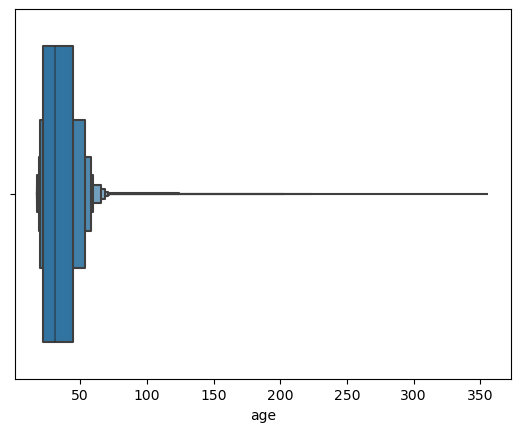

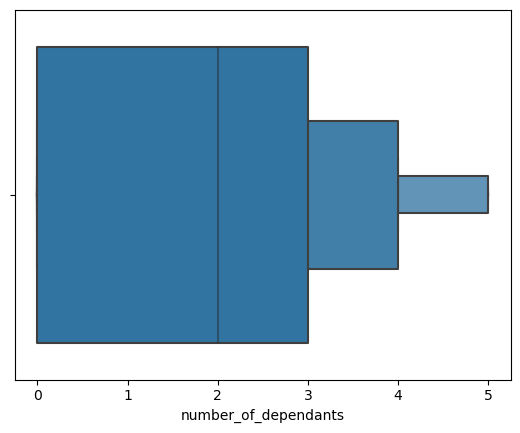

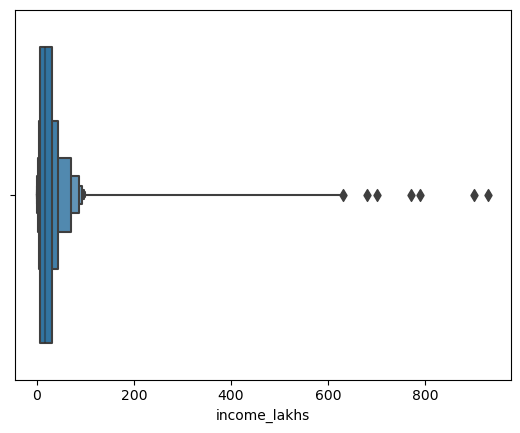

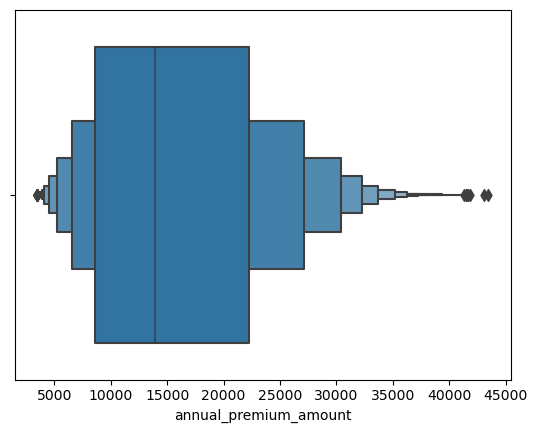

In [13]:
for col in numeric_columns:
    sns.boxenplot(x=df[col])
    plt.show()

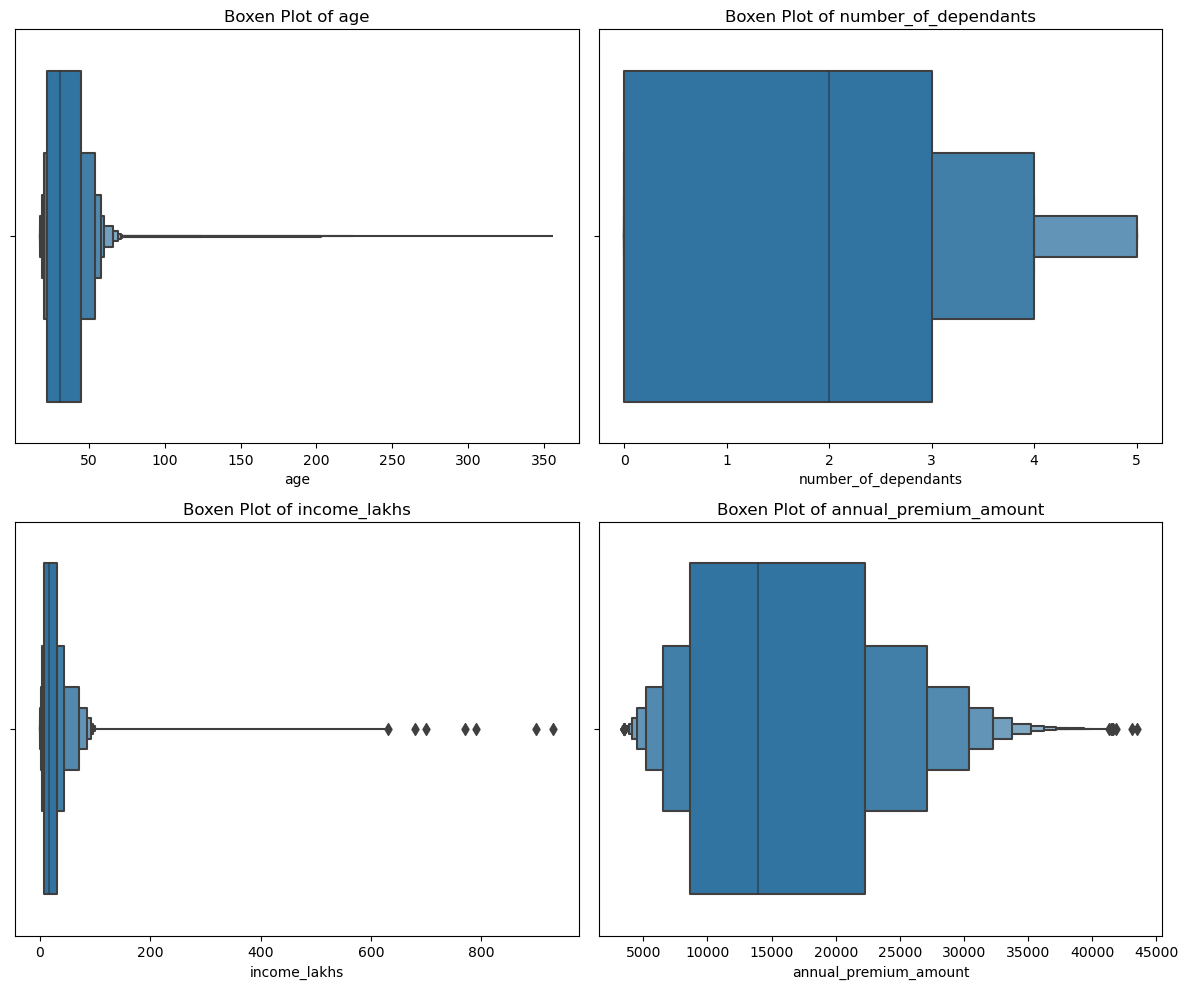

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjust the size as necessary

# Flatten the axes array for easy indexing (axes is a 2D array)
axes = axes.flatten()

# Loop through the numeric columns and plot each boxen plot on the corresponding subplot
for i, col in enumerate(numeric_columns):
    sns.boxenplot(x=df[col], ax=axes[i])  # Plot on the correct subplot axis
    axes[i].set_title(f'Boxen Plot of {col}')  # Set the title for each subplot

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show all plots at once
plt.show()

In [15]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356], dtype=int64)

In [16]:
df1=df[df.age<=100]
df1.age.describe()

count    49918.000000
mean        34.401839
std         13.681600
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max         72.000000
Name: age, dtype: float64

In [17]:
def get_iqr_bounds(col):
    Q1, Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return lower_bound, upper_bound
lower, upper = get_iqr_bounds(df1['income_lakhs'])
lower, upper

(-29.0, 67.0)

In [18]:
df1[df1.income_lakhs>upper].shape

(3559, 13)

In [19]:
quantile_thresold = df1.income_lakhs.quantile(0.999)
quantile_thresold

100.0

In [20]:
df1[df1.income_lakhs>quantile_thresold].shape

(10, 13)

In [21]:
df2 = df1[df1.income_lakhs<quantile_thresold].copy()
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111
49996,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076
49997,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564
49998,18,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,9490


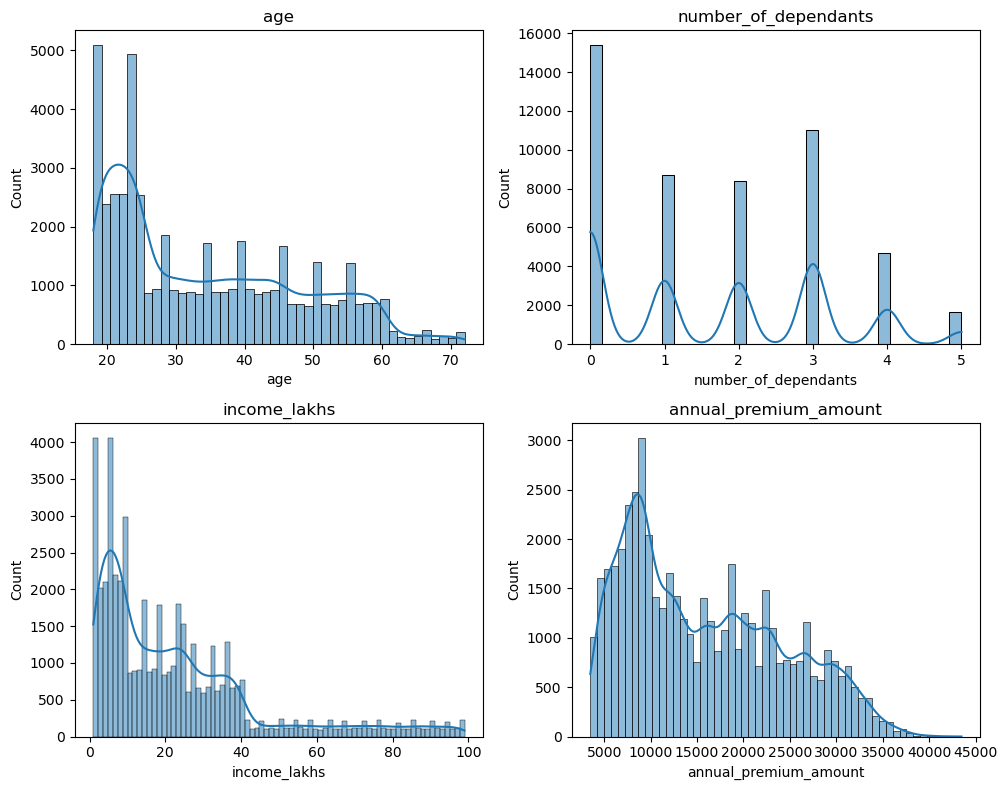

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  # Adjust the size as necessary

for i, column in enumerate(numeric_columns):
    ax = axs[i//2, i%2]  # Determines the position of the subplot in the grid
    sns.histplot(df2[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

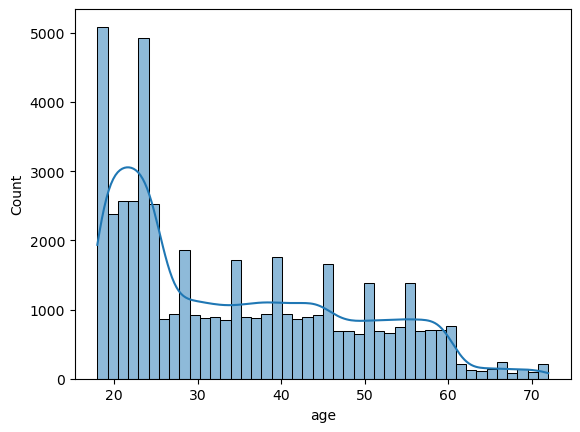

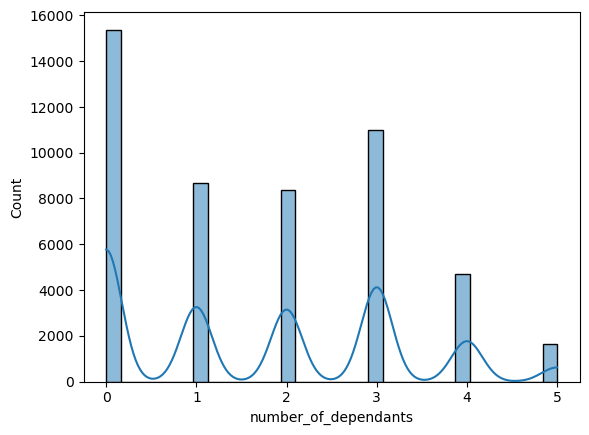

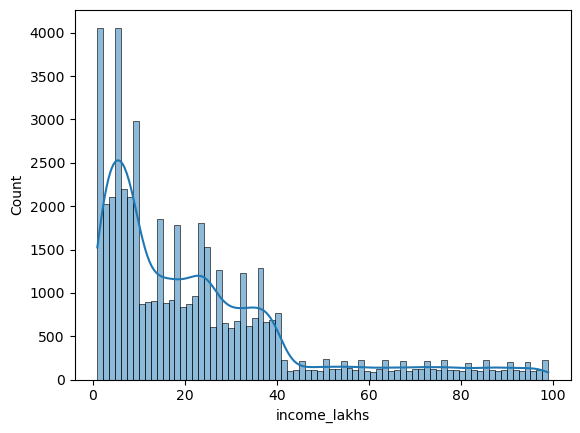

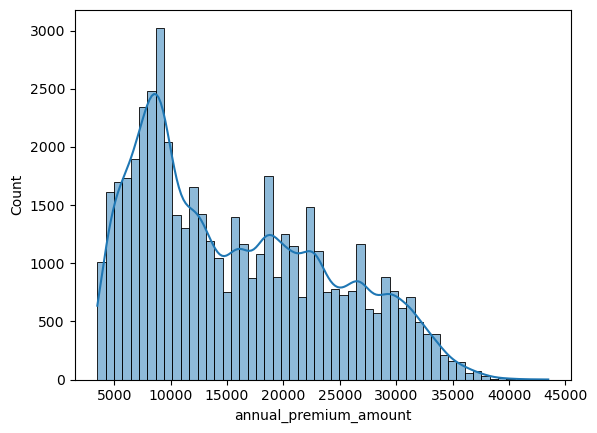

In [23]:
for col in numeric_columns:
    sns.histplot(df2[col], kde=True)
    plt.show()

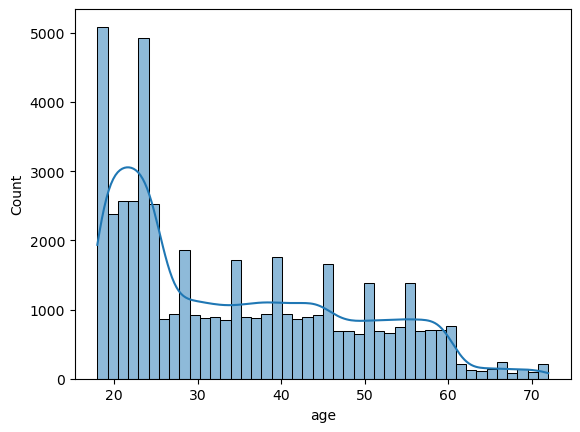

In [24]:
sns.histplot(df2['age'], kde=True)
plt.show()

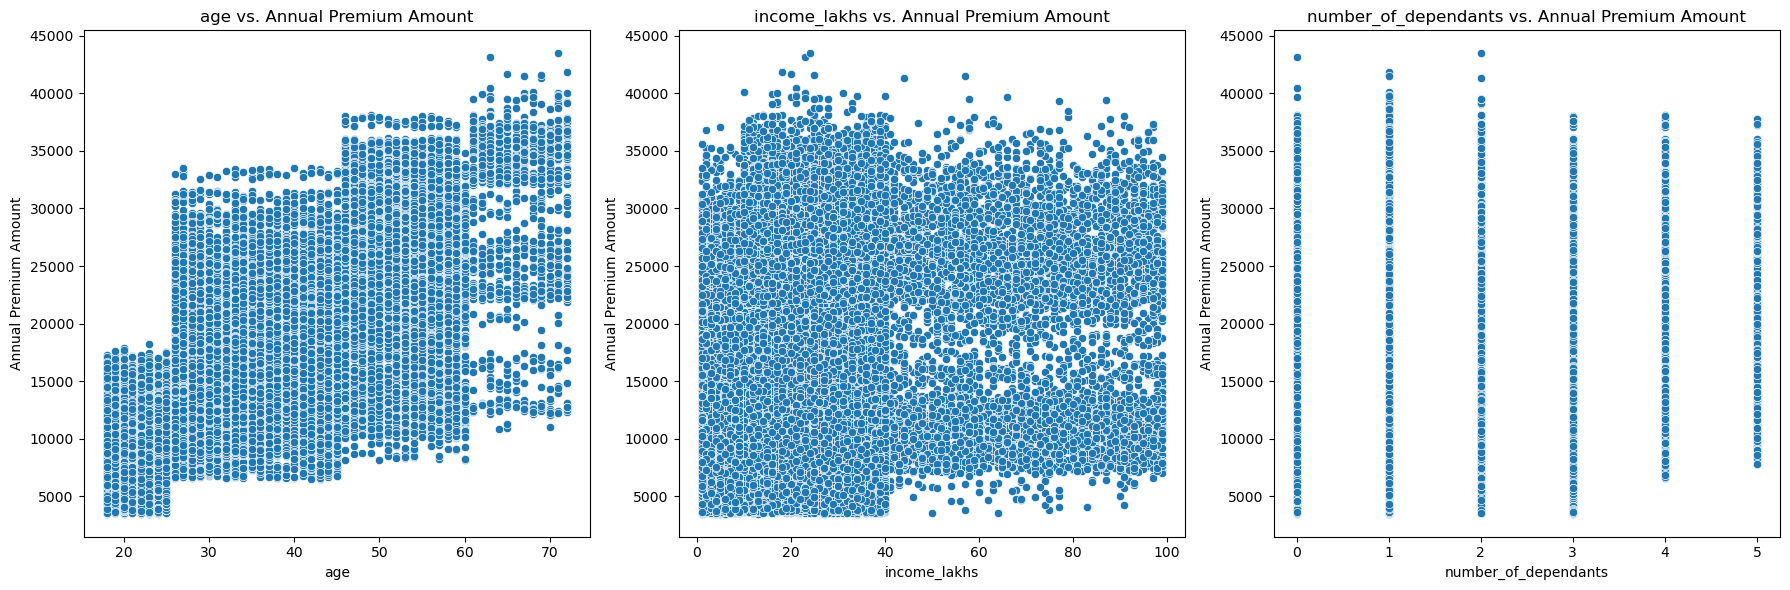

In [25]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

<AxesSubplot:xlabel='age', ylabel='annual_premium_amount'>

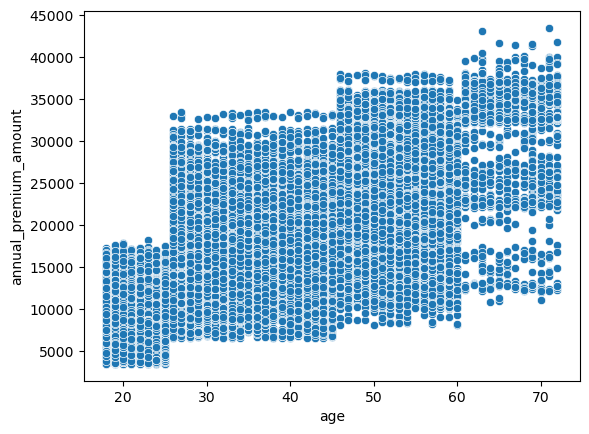

In [26]:
sns.scatterplot(data=df2, x='age', y='annual_premium_amount')

<AxesSubplot:xlabel='age', ylabel='income_lakhs'>

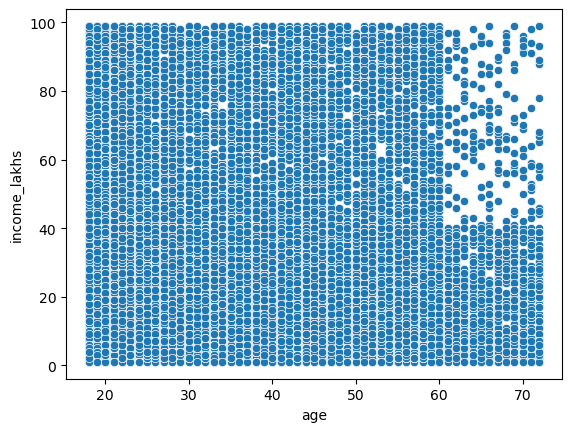

In [27]:
sns.scatterplot(data=df2, x='age', y='income_lakhs')

In [28]:
df2.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


In [29]:
categorical_cols= ['gender','region','marital_status','bmi_category','smoking_status','employment_status','medical_history','medical_history','insurance_plan']
for col in categorical_col:
    print(col, ':', df2[col].unique())

NameError: name 'categorical_col' is not defined

In [ ]:
df2['smoking_status'].replace({'Smoking=0':'No Smoking','Does Not Smoke':'No Smoking',
                              'Not Smoking':'No Smoking'},
                               inplace=True)
df2['smoking_status'].unique()

In [30]:
pct_count=df2['gender'].value_counts(normalize=True)
pct_count

Male      0.54953
Female    0.45047
Name: gender, dtype: float64

In [31]:
pct_count.values

array([0.5495302, 0.4504698])

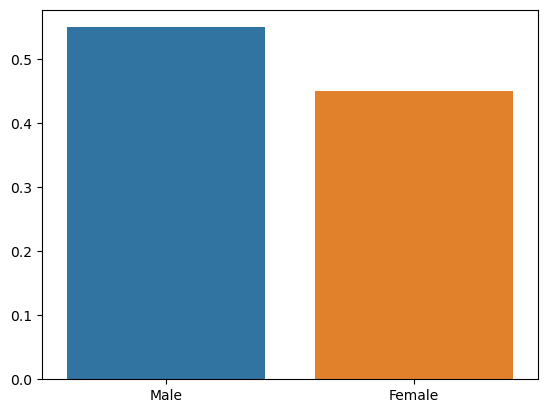

In [32]:
sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

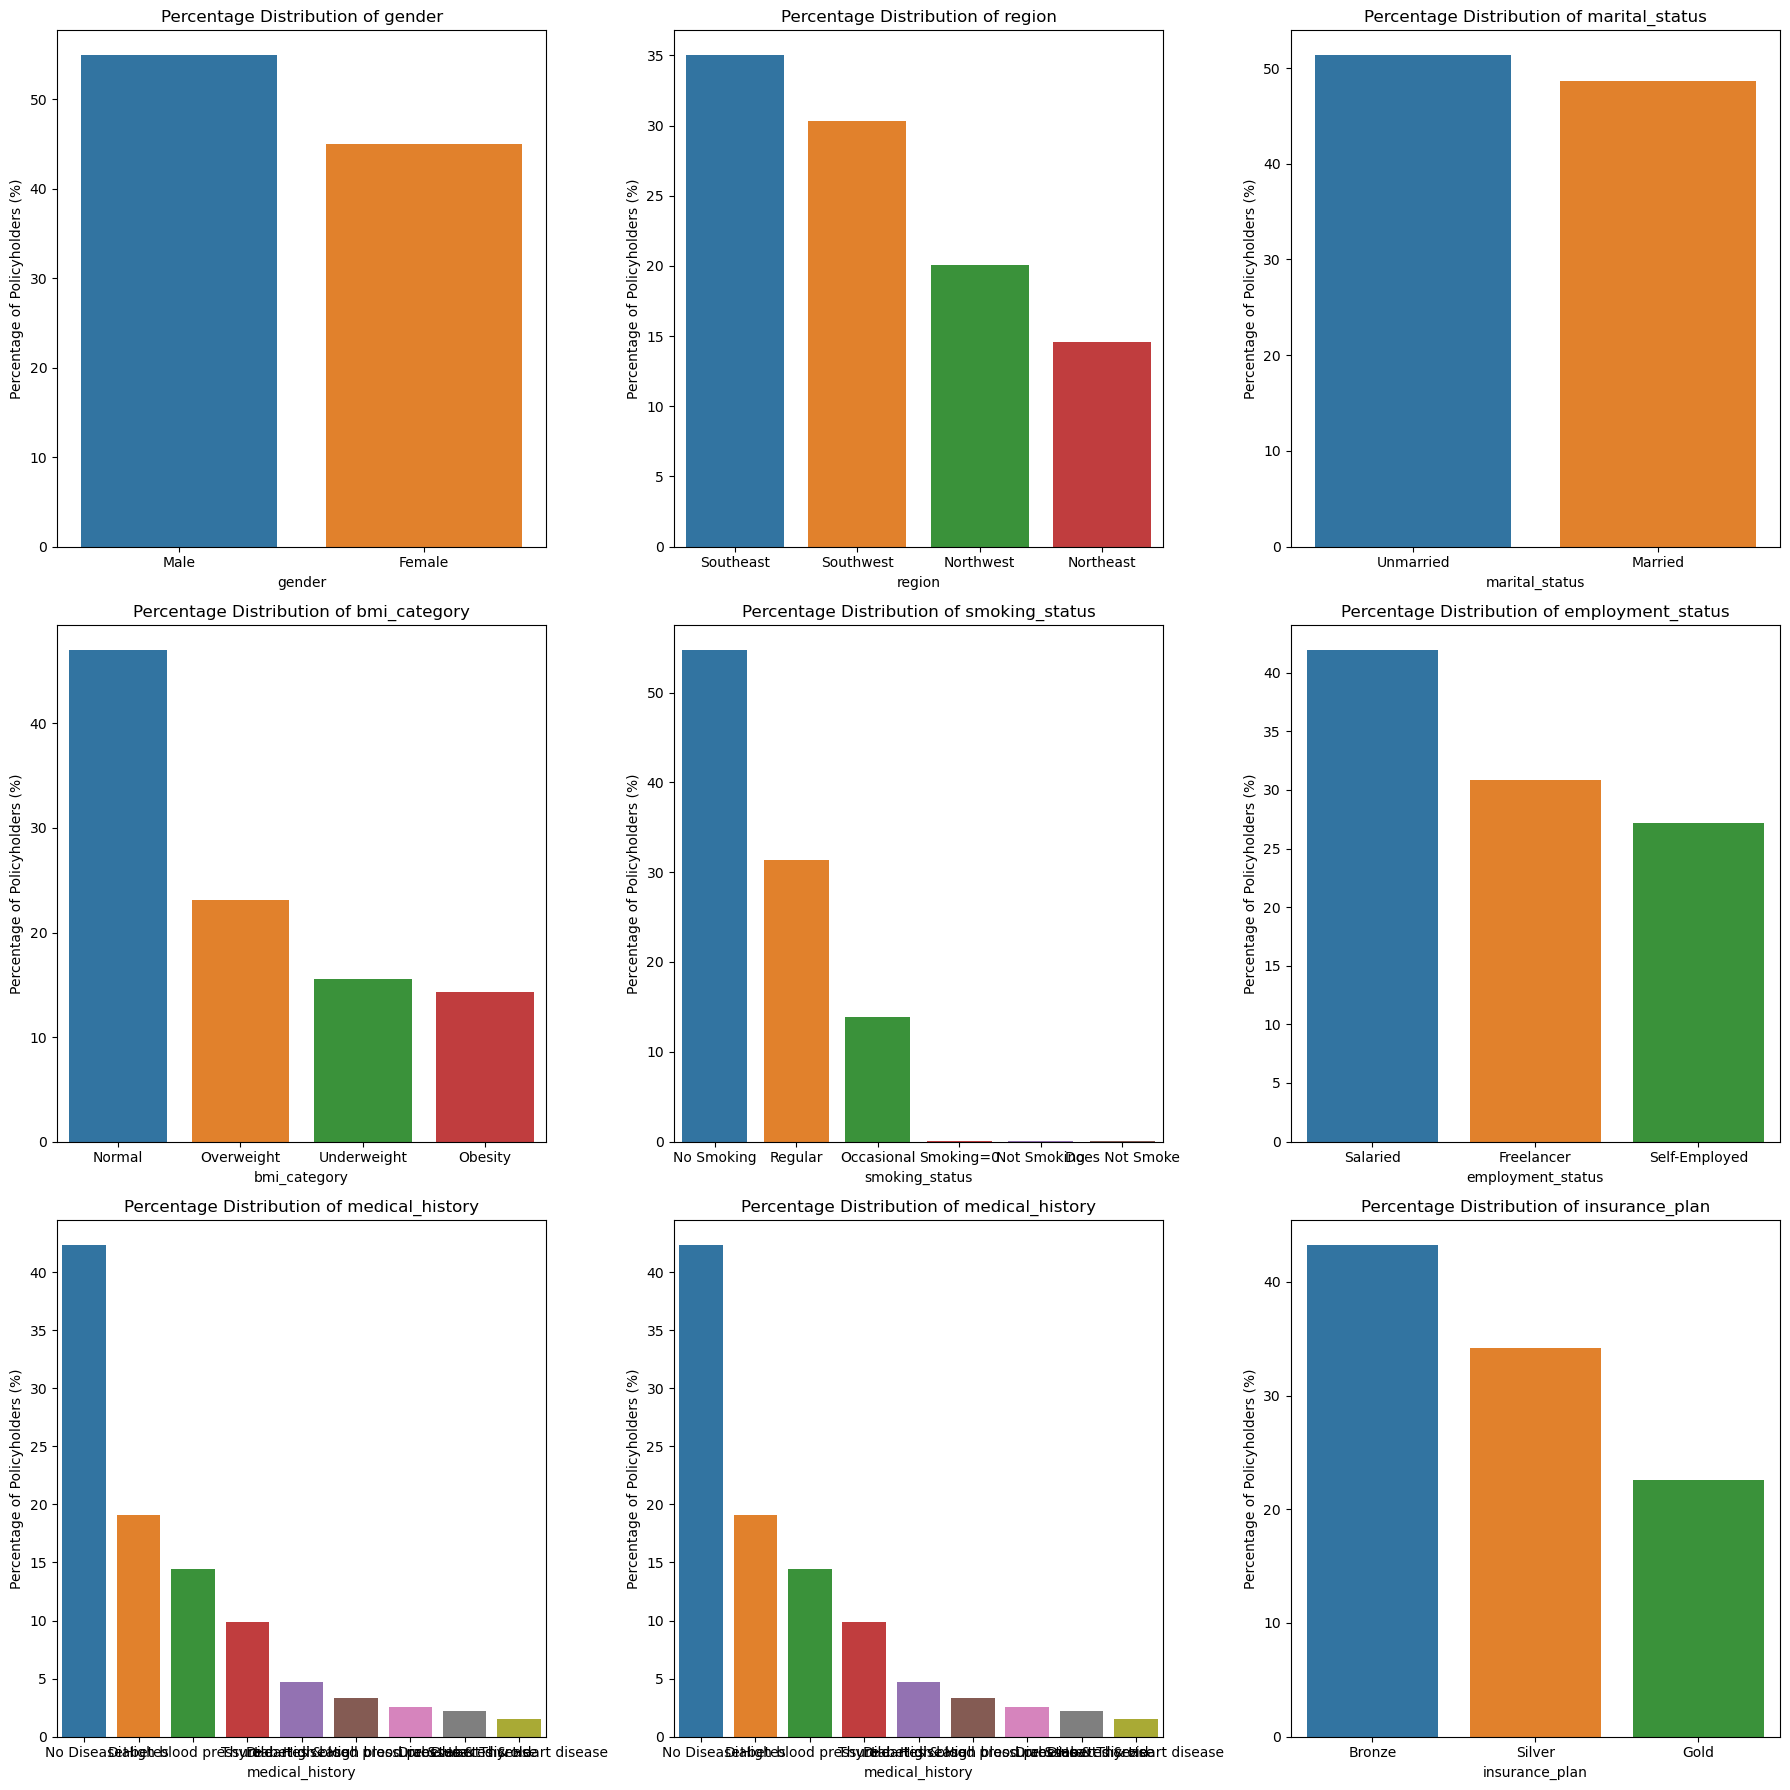

In [33]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, categorical_cols):
    # Calculate the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

In [34]:
cross_tab=pd.crosstab(df2['income_level'], df2['insurance_plan'])
cross_tab


insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,5307,3880,5182
25L - 40L,3683,2840,3750
<10L,12226,931,5486
> 40L,326,3593,2604


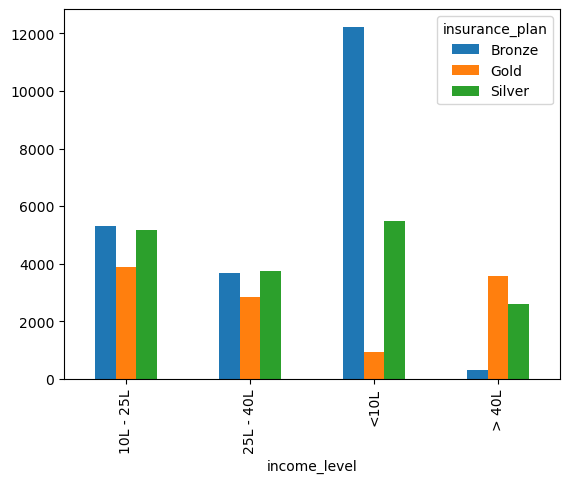

In [35]:
cross_tab.plot(kind="bar")
plt.show()

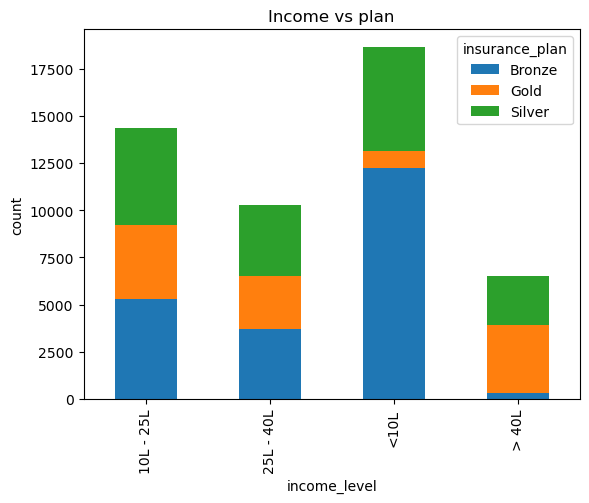

In [36]:
cross_tab.plot(kind="bar",stacked=True)
plt.title('Income vs plan')
plt.ylabel('count')
plt.show()

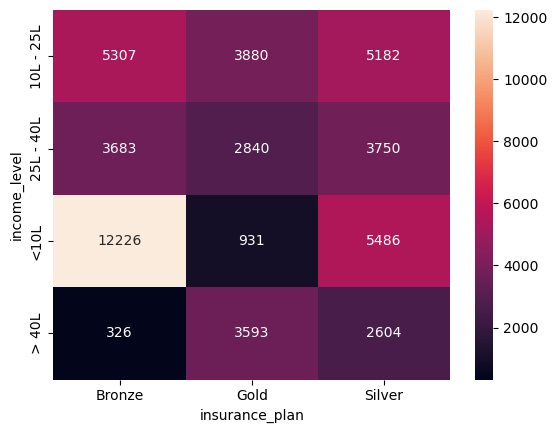

In [37]:
sns.heatmap(cross_tab, annot=True,fmt='d')
plt.show()


In [38]:
 df.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339


In [39]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [40]:
risk_scores = {  "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0}


In [41]:
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571


In [42]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [43]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})

In [44]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

In [45]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,4,77,No Disease,3,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,high blood pressure,none,6,0.428571


In [46]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_No Smoking,smoking_status_Not Smoking,smoking_status_Occasional,smoking_status_Regular,smoking_status_Smoking=0,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,0,1,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,0,0,0,1,0,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,1,0,0,0,0,0,1


In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49808 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              49808 non-null  int64  
 1   number_of_dependants             49808 non-null  int64  
 2   income_level                     49808 non-null  int64  
 3   income_lakhs                     49808 non-null  int64  
 4   medical_history                  49808 non-null  object 
 5   insurance_plan                   49808 non-null  int64  
 6   annual_premium_amount            49808 non-null  int64  
 7   disease1                         49808 non-null  object 
 8   disease2                         49808 non-null  object 
 9   total_risk_score                 49808 non-null  int64  
 10  normalized_risk_score            49808 non-null  float64
 11  gender_Male                      49808 non-null  int32  
 12  region_Northwest  

In [48]:
df4 = df3.drop(['medical_history','disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head(3)  

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,...,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_No Smoking,smoking_status_Not Smoking,smoking_status_Occasional,smoking_status_Regular,smoking_status_Smoking=0,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,...,0,0,0,1,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,...,1,0,0,0,0,0,1,0,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [49]:
df4.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'normalized_risk_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_No Smoking', 'smoking_status_Not Smoking',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'smoking_status_Smoking=0', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

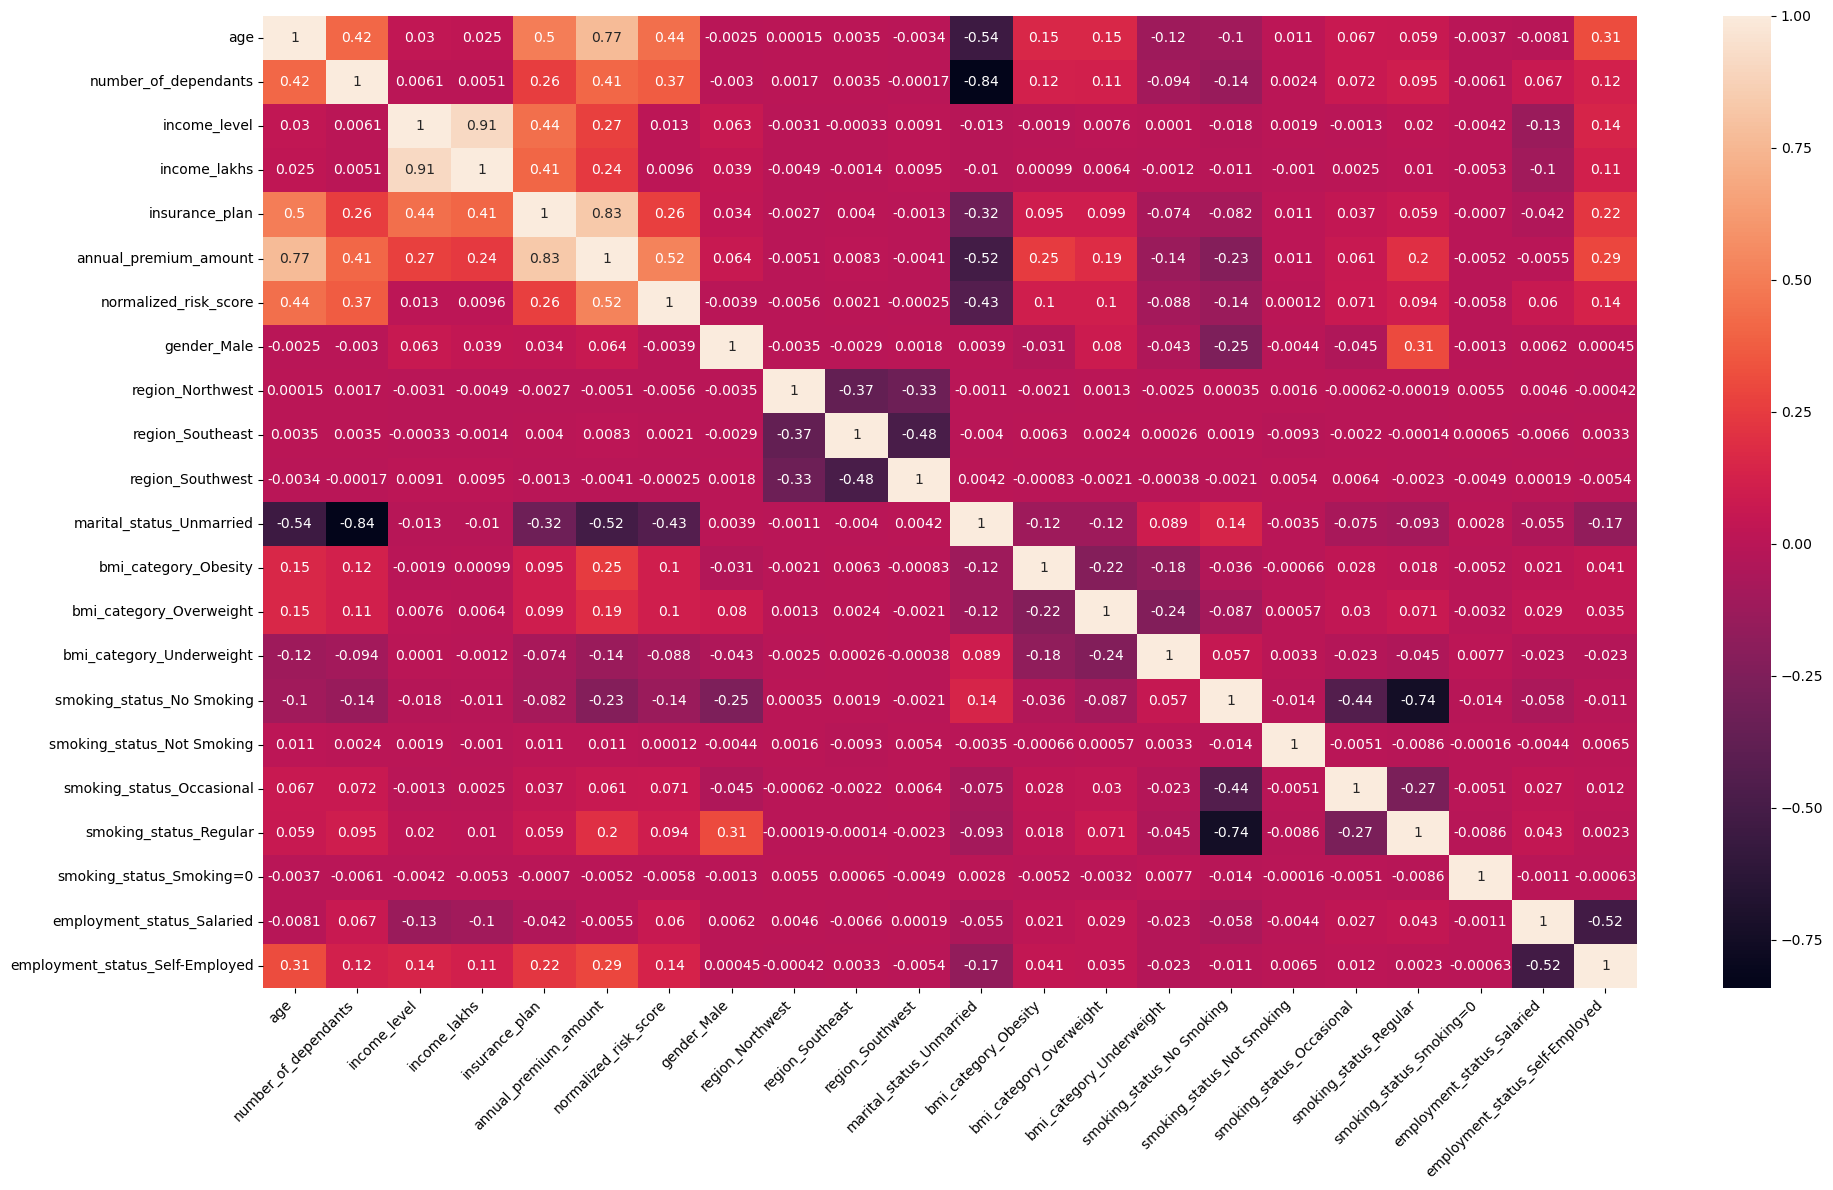

In [50]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [53]:
df4.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,...,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_No Smoking,smoking_status_Not Smoking,smoking_status_Occasional,smoking_status_Regular,smoking_status_Smoking=0,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,...,0,0,0,1,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,...,1,0,0,0,0,0,1,0,1,0


In [54]:
X = df4.drop('annual_premium_amount', axis='columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,...,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_No Smoking,smoking_status_Not Smoking,smoking_status_Occasional,smoking_status_Regular,smoking_status_Smoking=0,employment_status_Salaried,employment_status_Self-Employed
count,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,...,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000
mean,0.303691,0.343443,0.364627,0.221787,0.396623,0.291816,0.549530,0.200972,0.350365,0.302963,...,0.143250,0.231148,0.155276,0.547502,0.000161,0.138291,0.313765,0.000161,0.419471,0.272004
std,0.253393,0.298411,0.348905,0.223692,0.392273,0.287456,0.497546,0.400731,0.477089,0.459544,...,0.350331,0.421571,0.362171,0.497743,0.012673,0.345209,0.464027,0.012673,0.493477,0.444997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.061224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.153061,0.500000,0.357143,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.306122,0.500000,0.428571,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
calculate_vif(x)

NameError: name 'calculate_vif' is not defined

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [58]:
calculate_vif(X)

,Column,VIF
0,age,4.956408
1,number_of_dependants,8.091596
2,income_level,12.644726
3,income_lakhs,11.397375
4,insurance_plan,3.575587
5,normalized_risk_score,2.744395
6,gender_Male,2.483867
7,region_Northwest,2.379149
8,region_Southeast,3.404767
9,region_Southwest,3.080084


In [59]:
calculate_vif(X.drop('income_level', axis = 'columns'))

,Column,VIF
0,age,4.923983
1,number_of_dependants,8.091437
2,income_lakhs,2.541182
3,insurance_plan,3.438555
4,normalized_risk_score,2.744383
5,gender_Male,2.475010
6,region_Northwest,2.378963
7,region_Southeast,3.404563
8,region_Southwest,3.079877
9,marital_status_Unmarried,8.470317


In [63]:
X_reduced=X.drop('income_level', axis='columns')
X_reduced

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_No Smoking,smoking_status_Not Smoking,smoking_status_Occasional,smoking_status_Regular,smoking_status_Smoking=0,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.051020,0.0,0.428571,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1,0.203704,0.4,0.051020,0.0,0.428571,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
2,0.574074,0.4,0.193878,0.5,0.428571,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0.222222,0.6,0.775510,1.0,0.000000,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4,0.000000,0.0,1.000000,0.5,0.428571,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.111111,0.0,0.346939,0.0,0.000000,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1
49996,0.537037,0.4,0.826531,1.0,0.357143,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
49997,0.055556,0.0,0.316327,0.0,0.000000,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0
49998,0.000000,0.4,0.193878,0.0,0.000000,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (34865, 20)
x test:  (14943, 20)
y train:  (34865,)
y test:  (14943,)


In [65]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)
train_score, test_score

(0.9282915584040433, 0.92770664224584)

In [66]:
model_lr.coef_

array([11320.53007182,  -598.49962781,  -387.59662199, 12445.46900862,
        4830.48901184,   141.2204931 ,   -19.83631016,    73.01964961,
          18.75428603,  -880.0024989 ,  3363.69315001,  1615.79583484,
         360.21930533,   988.57495643,  2669.91951262,  1667.73373112,
        3227.80479924,   954.38567852,   165.49788776,   415.10722762])

In [67]:
model_lr.intercept_

3732.39070982022

In [70]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  5134580.348029684 RMSE:  2265.9612415109145


In [71]:
X_test.shape

(14943, 20)

In [72]:
y_test.shape

(14943,)

In [74]:
X_train.shape

(34865, 20)

In [75]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([11320.530072,  -598.499628,  -387.596622, 12445.469009,
        4830.489012,   141.220493,   -19.83631 ,    73.01965 ,
          18.754286,  -880.002499,  3363.69315 ,  1615.795835,
         360.219305,   988.574956,  2669.919513,  1667.733731,
        3227.804799,   954.385679,   165.497888,   415.107228])

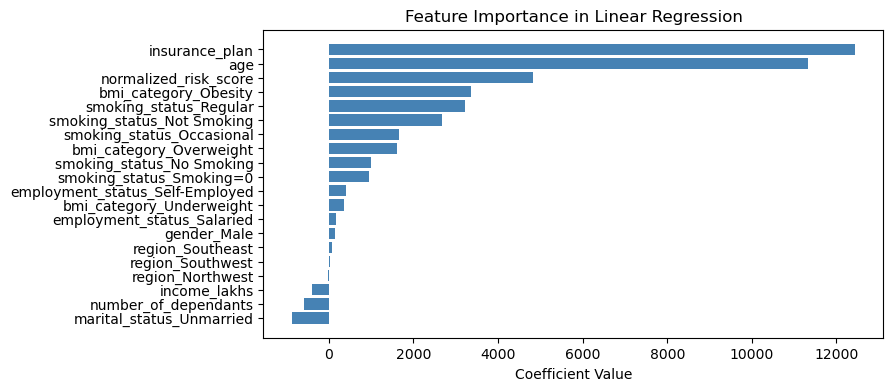

In [76]:
feature_importance = model_lr.coef_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [77]:
model_rg = Ridge(alpha=1)
model_rg.fit(X_train, y_train)
test_score = model_rg.score(X_test, y_test)
train_score = model_rg.score(X_train, y_train)
train_score, test_score

(0.9282896276090317, 0.9277093497655253)

In [78]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
test_score = model_xgb.score(X_test, y_test)
train_score = model_xgb.score(X_train, y_train)
train_score, test_score

(0.9859141400244732, 0.9814041079327802)

In [81]:
y_pred = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBOOST Regression ==> MSE: ", mse_xgb, "RMSE: ", rmse_xgb)

XGBOOST Regression ==> MSE:  1320758.98711363 RMSE:  1149.2427885845661


In [82]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

0.9810938747120351

In [83]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [84]:
best_model = random_search.best_estimator_

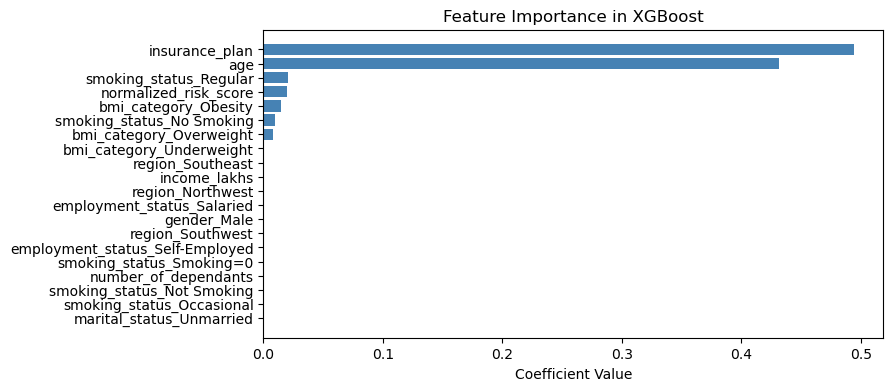

In [85]:
feature_importance = best_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

### error analysis

In [86]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
34025,6539,6574.299316,35.299316,0.539827
29504,11853,14646.029297,2793.029297,23.563902
12892,31155,30528.023438,-626.976562,-2.012443
34662,4395,6691.889648,2296.889648,52.261425
25334,19986,19439.076172,-546.923828,-2.736535


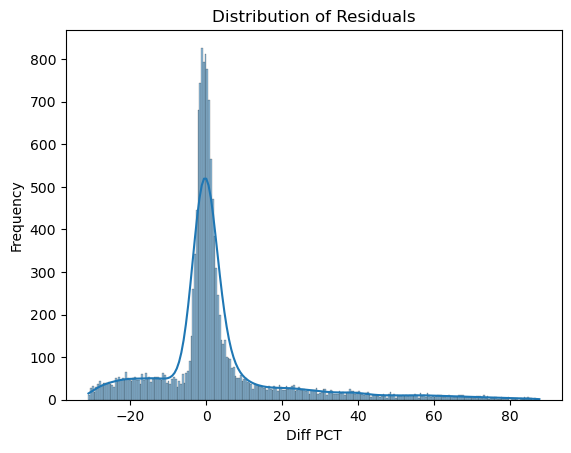

In [87]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [88]:
results_df[np.abs(results_df.diff_pct)>10]

,actual,predicted,diff,diff_pct
29504,11853,14646.029297,2793.029297,23.563902
34662,4395,6691.889648,2296.889648,52.261425
7446,5777,7300.687500,1523.687500,26.375065
33557,9259,6943.484863,-2315.515137,-25.008264
15549,11951,10687.882812,-1263.117188,-10.569134
...,...,...,...,...
40017,4563,6919.734863,2356.734863,51.648803
49612,8657,7699.866211,-957.133789,-11.056183
7088,7898,7021.382812,-876.617188,-11.099230
5643,11861,14150.783203,2289.783203,19.305145


In [89]:
extreme_error_threshold = 10  # You can adjust this threshold based on your domain knowledge or requirements
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct
29504,11853,14646.029297,2793.029297,23.563902
34662,4395,6691.889648,2296.889648,52.261425
7446,5777,7300.687500,1523.687500,26.375065
33557,9259,6943.484863,-2315.515137,-25.008264
15549,11951,10687.882812,-1263.117188,-10.569134


In [90]:
extreme_results_df.shape

(4441, 4)

In [91]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

29.71960115104062

In [92]:
results_df[np.abs(results_df.diff_pct)>50]

,actual,predicted,diff,diff_pct
34662,4395,6691.889648,2296.889648,52.261425
40546,3799,6656.835449,2857.835449,75.225992
28654,4126,6556.066895,2430.066895,58.896435
46497,3833,6582.698730,2749.698730,71.737509
6566,4537,7051.987793,2514.987793,55.432837
...,...,...,...,...
19473,4022,6689.395996,2667.395996,66.320139
38142,5082,7794.604492,2712.604492,53.376712
22937,4991,7794.604492,2803.604492,56.173202
25114,4222,6714.015625,2492.015625,59.024529


In [93]:
extreme_results_df[abs(extreme_results_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

,actual,predicted,diff,diff_pct
624,3505,6582.698730,3077.698730,87.808808
10288,3517,6590.278320,3073.278320,87.383518
7461,3503,6556.066895,3053.066895,87.155778
49360,3512,6565.610352,3053.610352,86.947903
1692,3522,6581.878906,3059.878906,86.879015
...,...,...,...,...
48092,4655,7002.229980,2347.229980,50.423845
15496,4713,7084.086426,2371.086426,50.309493
26239,4436,6665.234863,2229.234863,50.253266
30523,4454,6691.889648,2237.889648,50.244491


In [94]:
extreme_results_df.index

Int64Index([29504, 34662,  7446, 33557, 15549,   852, 20442, 46319,  9134,
            33757,
            ...
             5442, 37256,  8277, 28359, 35325, 40017, 49612,  7088,  5643,
             1549],
           dtype='int64', length=4441)

In [95]:
X_test.index

Int64Index([34025, 29504, 12892, 34662, 25334, 43218, 49929, 25859,  7679,
            46433,
            ...
            18108, 49612,  7088, 22926,  5764,  5643, 16246,  1549,  4372,
            36578],
           dtype='int64', length=14943)

In [97]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_No Smoking,smoking_status_Not Smoking,smoking_status_Occasional,smoking_status_Regular,smoking_status_Smoking=0,employment_status_Salaried,employment_status_Self-Employed
29504,0.092593,0.6,0.040816,1.0,0.428571,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
34662,0.000000,0.6,0.102041,0.0,0.000000,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
7446,0.037037,0.0,0.336735,0.0,0.000000,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0
33557,0.129630,0.0,0.367347,0.0,0.000000,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0
15549,0.092593,0.0,0.632653,0.5,0.000000,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40017,0.074074,0.0,0.255102,0.0,0.000000,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
49612,0.111111,0.2,0.071429,0.0,0.428571,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0
7088,0.018519,0.0,0.346939,0.0,0.000000,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0
5643,0.129630,0.2,0.010204,1.0,0.000000,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


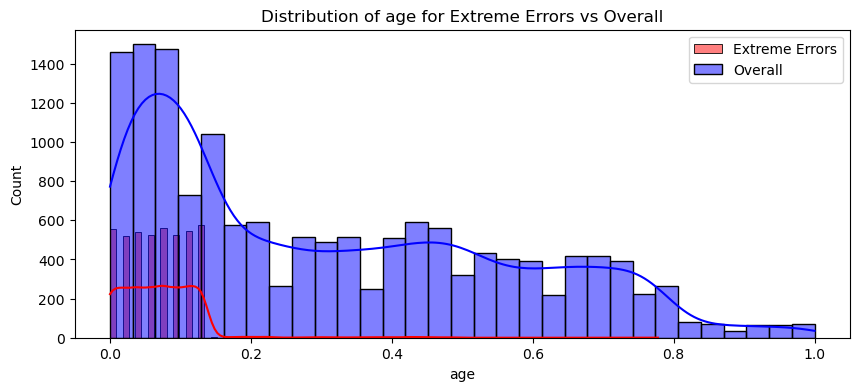

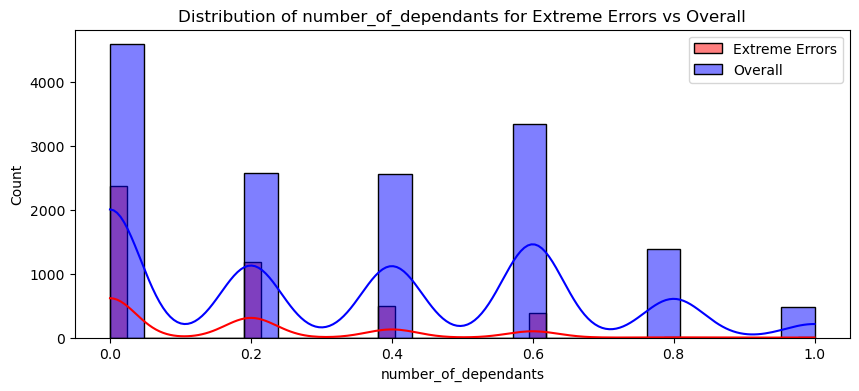

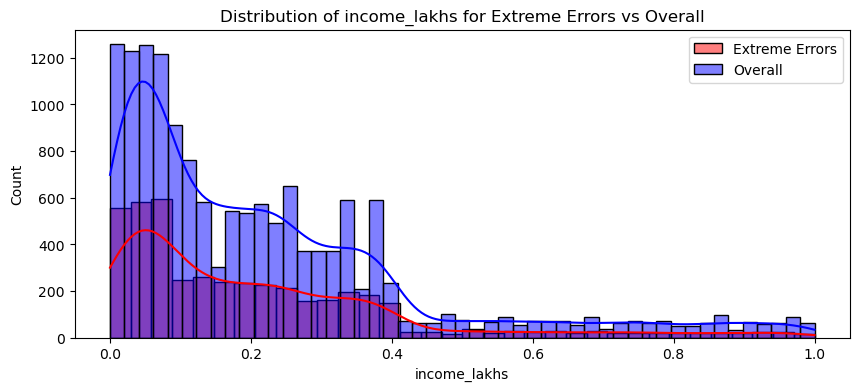

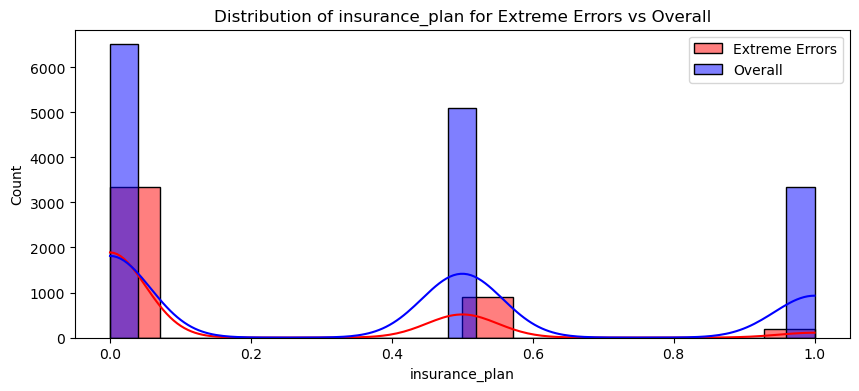

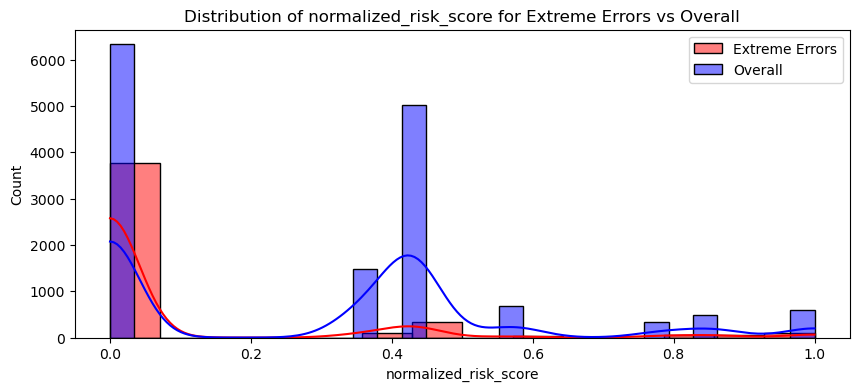

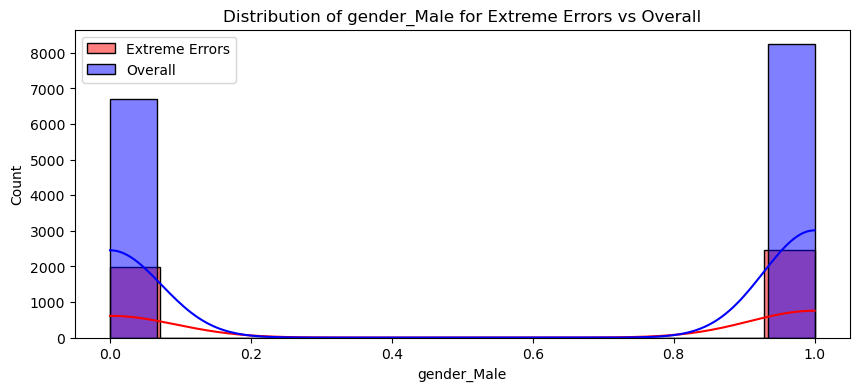

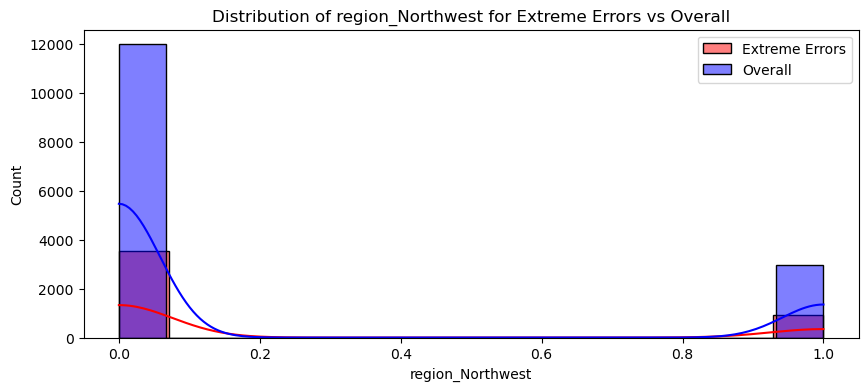

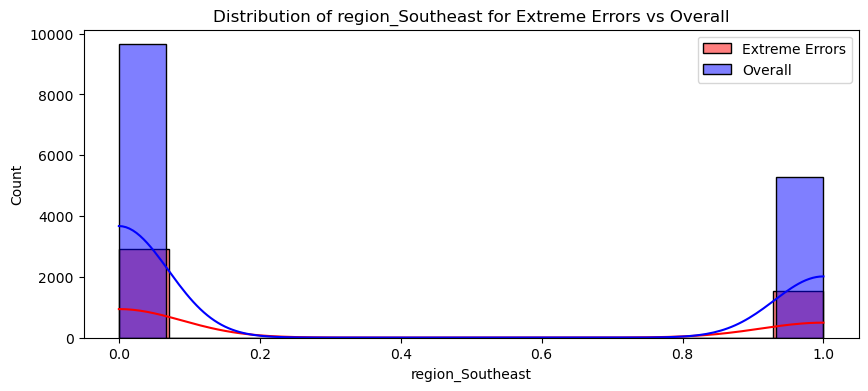

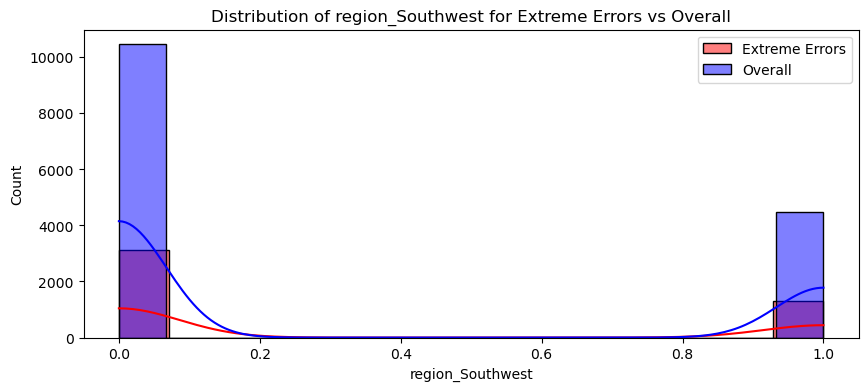

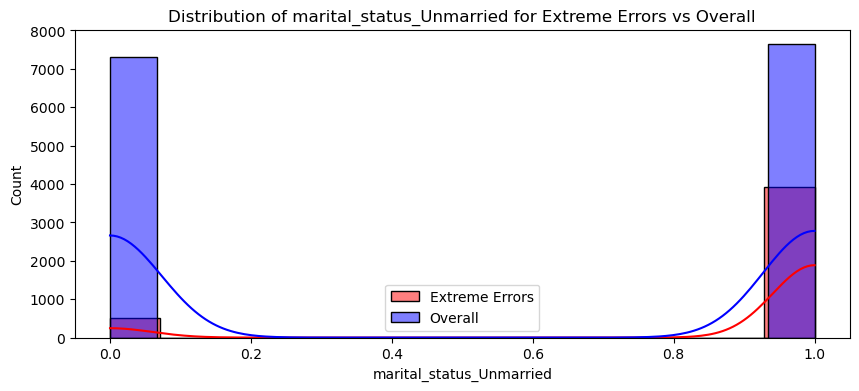

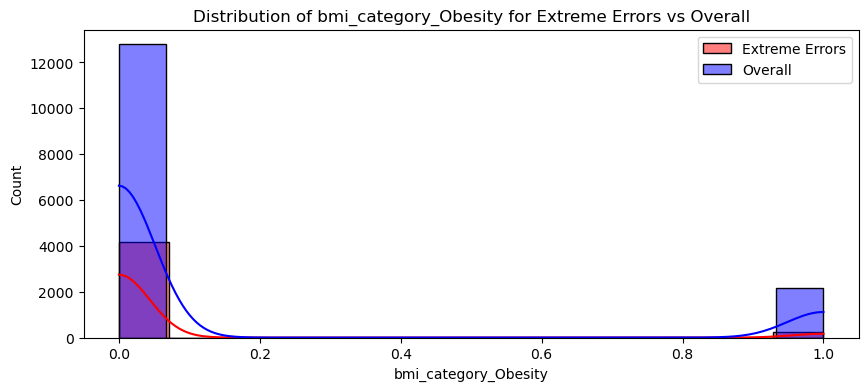

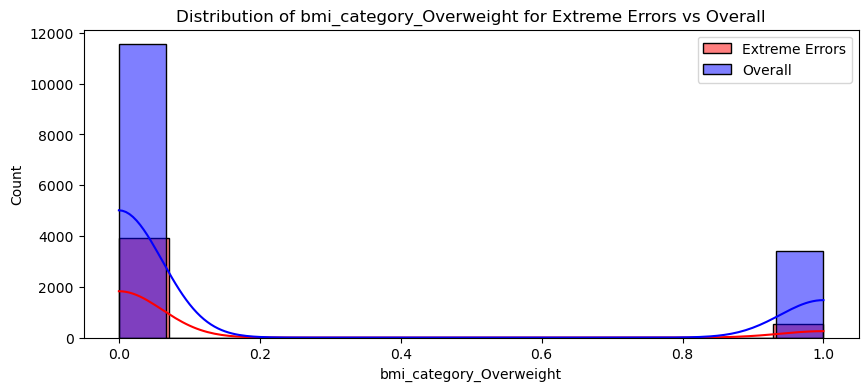

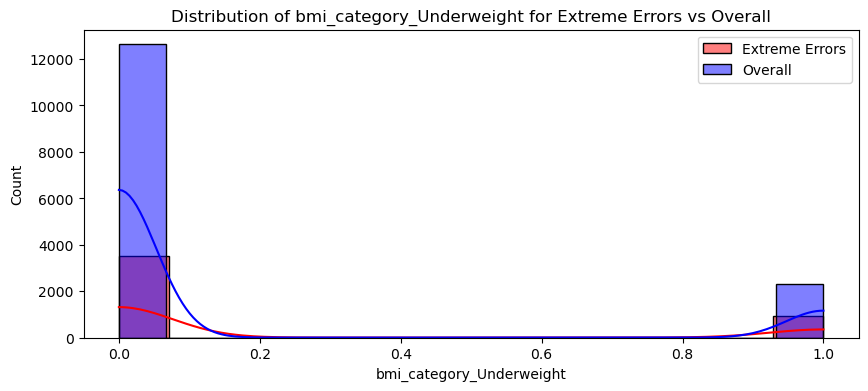

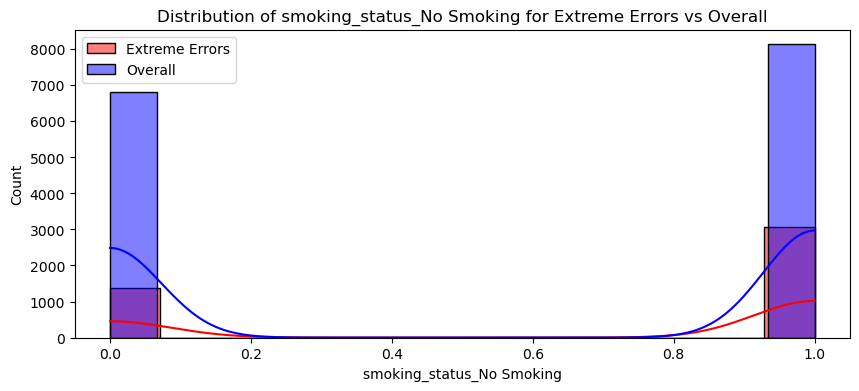

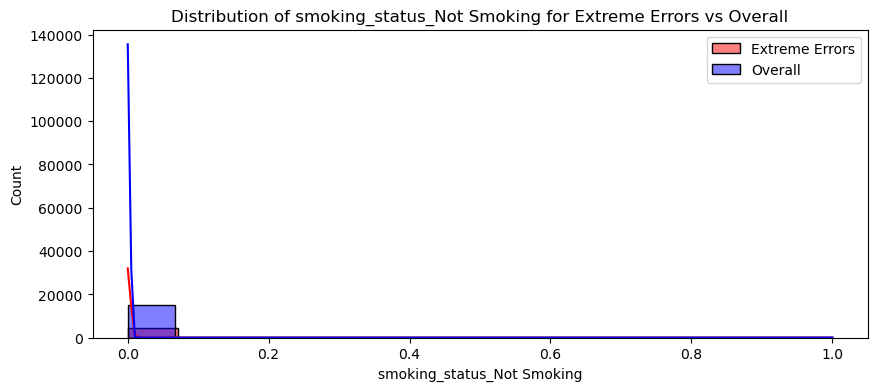

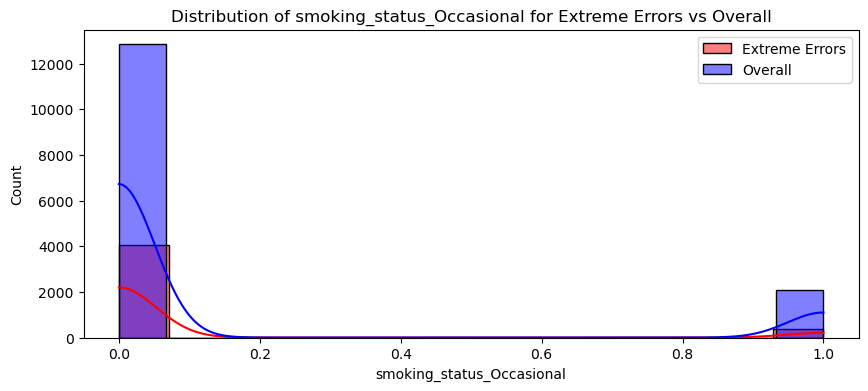

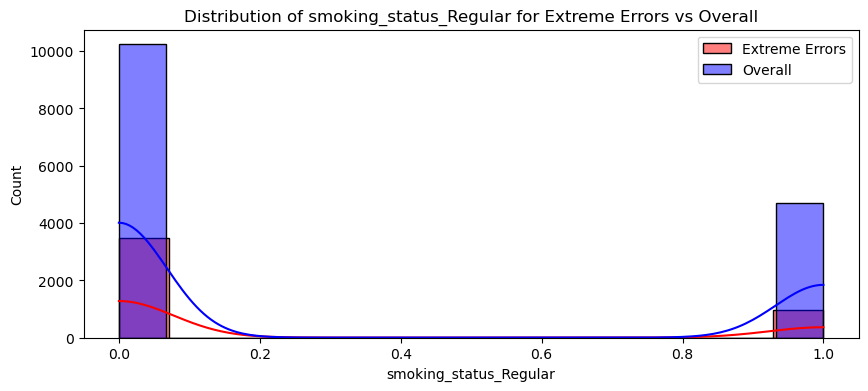

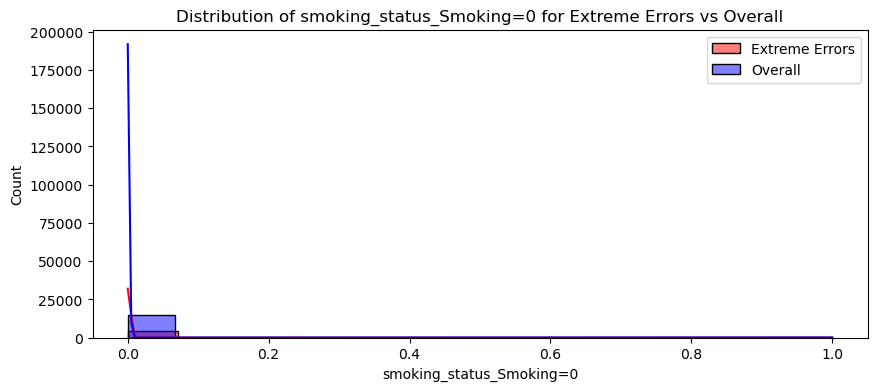

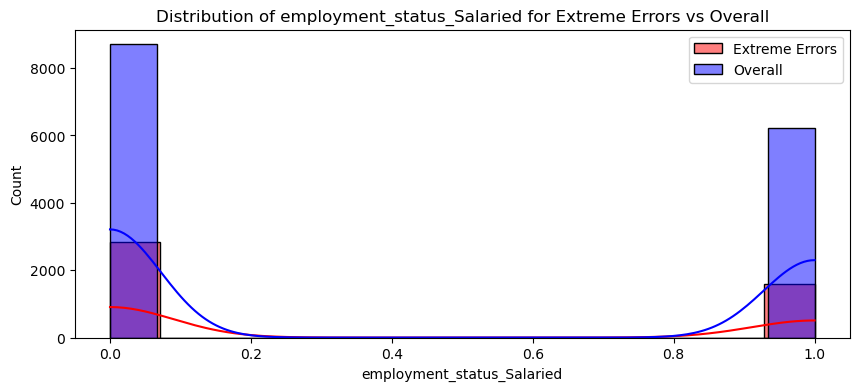

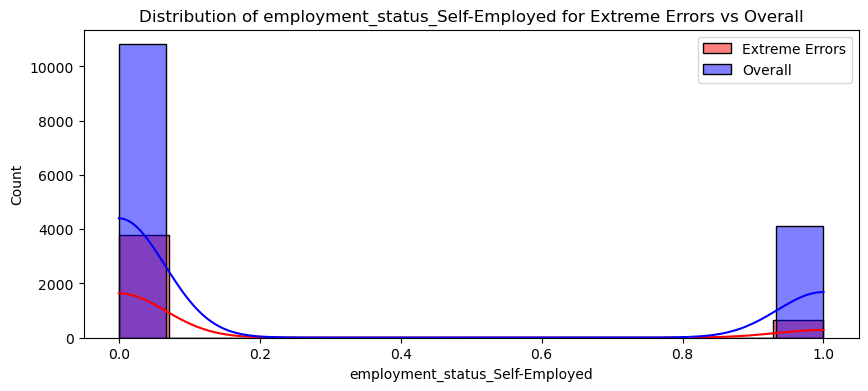

In [98]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

In [99]:
extreme_errors_df['income_level']=-1

In [100]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,23.0,3.0,-2.0,5.0,3.0
1,18.0,3.0,-2.0,11.0,1.0
2,20.0,0.0,-2.0,34.0,1.0
3,25.0,0.0,-2.0,37.0,1.0
4,23.0,0.0,-2.0,63.0,2.0


In [101]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,4441.000000,4441.000000,4441.0,4441.000000,4441.000000
mean,21.821211,0.757937,-2.0,21.143436,1.290475
std,3.167047,0.980070,0.0,20.186493,0.540538
min,18.000000,0.000000,-2.0,1.000000,1.000000
25%,20.000000,0.000000,-2.0,6.000000,1.000000
50%,22.000000,0.000000,-2.0,15.000000,1.000000
75%,24.000000,1.000000,-2.0,30.000000,1.000000
max,60.000000,5.000000,-2.0,99.000000,3.000000


<AxesSubplot:xlabel='age', ylabel='Count'>

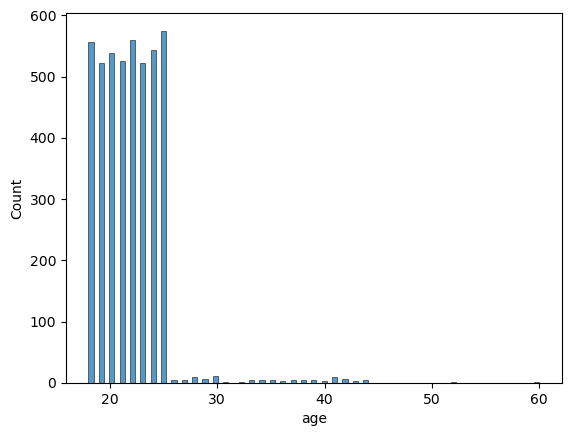

In [102]:
sns.histplot(df_reversed.age)